# Homework 5

---
## Name: Jerry Allan Akshay  
## Github ID: fallen-axe-shay  
## USC ID: 8603760284  
---

### Import Statements

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
import graphviz
from skmultilearn.problem_transform import LabelPowerset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold 
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
import math
import functools
from IPython.display import IFrame, HTML
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
import xgboost as xgb
from sklearn.metrics import mean_squared_error

----
### CSS Styling

In [2]:
CSS = """div.output_area img {max-width:None !important;max-height: None !important";}"""
display(HTML('<style>{}</style>'.format(CSS)))

---
### Data

In [3]:
column_file = open('../data/communities.arff', 'r')
Lines = column_file.readlines()

communities_attr = []
for line in Lines:
    communities_attr.append(line.split(" ")[1])
    
diagnosis_attr = ['Temperature of patient', 'Occurrence of nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains', 'Burning of urethra', 'Inflammation of urinary bladder', 'Nephritis of renal pelvis origin']

In [4]:
communities_data = pd.read_csv('../data/communities.data', sep=',', header=None)
diagnosis_data = pd.read_csv("../data/diagnosis.data", sep=';', header=None)

In [5]:
communities_data.columns = [communities_attr]
diagnosis_data.columns = [diagnosis_attr]

In [6]:
temperature = []
for index, row in diagnosis_data['Temperature of patient'].iterrows():
    temperature.append(float(row[0].replace(',', '.')))
diagnosis_data['Temperature of patient'] = temperature

In [7]:
communities_data.columns = communities_data.columns.get_level_values(0)
diagnosis_data.columns = diagnosis_data.columns.get_level_values(0)

In [8]:
communities_data

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [9]:
diagnosis_data

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


### Answers

#### 1. b) Building a Decision Tree on the whole data set (for the Acute Inflammations Diagnosis Dataset)

In [10]:
X = diagnosis_data.drop(diagnosis_data.columns[-2:], axis=1)
Y = diagnosis_data.drop(diagnosis_data.columns[:-2], axis=1)

In [11]:
labelEncodersX = []
for x in X.columns[1:]:
    labelEncodersX.append(preprocessing.LabelEncoder())
    labelEncodersX[-1].fit(X[x].values.ravel())
    X[x] = labelEncodersX[-1].transform(X[x])
    
labelEncodersY = []
for y in Y.columns:
    labelEncodersY.append(preprocessing.LabelEncoder())
    labelEncodersY[-1].fit(Y[y].values.ravel())
    Y[y] = labelEncodersY[-1].transform(Y[y])

In [12]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt_labelled = LabelPowerset(classifier = dt)
dt.fit(X, dt_labelled.transform(Y))

DecisionTreeClassifier(criterion='entropy')

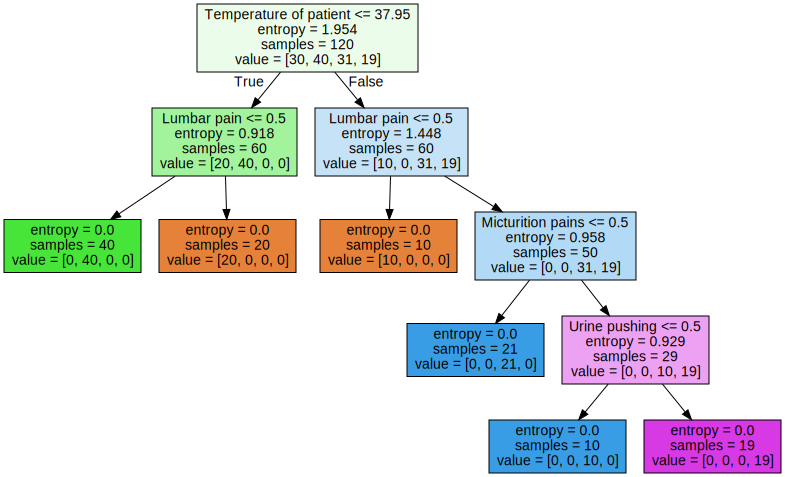

In [13]:
dotfile = open("../data/dt.dot", 'w')
tree.export_graphviz(dt, out_file=dotfile, feature_names=diagnosis_attr[:-2], filled=True)
dotfile.close()
graphviz.Source.from_file('../data/dt.dot')

#### Findings
1. The figure above depicts the decision tree for the Diagnosis Dataset, where:
    * The `Orange node` **denotes** `No - Inflammation of urinary bladder and No - Nephritis of renal pelvis origin`
    * The `Green node` **denotes** `Yes - Inflammation of urinary bladder and No Nephritis of renal pelvis origin`
    * The `Blue node` **denotes** `No - Inflammation of urinary bladder and Yes - Nephritis of renal pelvis origin`
    * The `Purple node` **denotes** `Yes - Inflammation of urinary bladder and Yes - Nephritis of renal pelvis origin`.

#### 1. c) Converting Decision rules into a set of IF-THEN rules

##### Reference: https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html

In [14]:
def tree_to_pseudo(tree, feature_names):
    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value
    def recurse(left, right, threshold, features, node, depth=0):
        indent = "\t" * depth
        if (threshold[node] != -2):
            print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) then :")
            if left[node] != -1:
                recurse(left, right, threshold, features, left[node], depth+1)
                print(indent,"else :")
                if right[node] != -1:
                    recurse(left, right, threshold, features, right[node], depth+1)
        else:
            print(indent,"return " + str(value[node][0]))
        
    recurse(left, right, threshold, features, 0)

In [15]:
tree_to_pseudo(dt, list(X.columns))

 if ( Temperature of patient <= 37.95000076293945 ) then :
	 if ( Lumbar pain <= 0.5 ) then :
		 return [ 0. 40.  0.  0.]
	 else :
		 return [20.  0.  0.  0.]
 else :
	 if ( Lumbar pain <= 0.5 ) then :
		 return [10.  0.  0.  0.]
	 else :
		 if ( Micturition pains <= 0.5 ) then :
			 return [ 0.  0. 21.  0.]
		 else :
			 if ( Urine pushing <= 0.5 ) then :
				 return [ 0.  0. 10.  0.]
			 else :
				 return [ 0.  0.  0. 19.]


#### Findings
1. The IF-THEN rules for the acute inflammations diagnosis dataset is shown above.
    * The array `[x 0. 0. 0.]` denotes `No - Inflammation of urinary bladder and No - Nephritis of renal pelvis origin` where `x` is any number.
    * The array `[0. x 0. 0.]` denotes `Yes - Inflammation of urinary bladder and No - Nephritis of renal pelvis origin` where `x` is any number.
    * The array `[0. 0. x 0.]` denotes `No - Inflammation of urinary bladder and Yes - Nephritis of renal pelvis origin` where `x` is any number.
    * The array `[0. 0. 0. x]` denotes `Yes - Inflammation of urinary bladder and Yes - Nephritis of renal pelvis origin` where `x` is any number.

#### 1. d) Cost-complexity pruning to find minimal decision tree

##### Reference: https://www.analyticsvidhya.com/blog/2020/10/cost-complexity-pruning-decision-trees/

#### Finding the best alpha

In [16]:
X = diagnosis_data.drop(diagnosis_data.columns[-2:], axis=1)
Y = diagnosis_data.drop(diagnosis_data.columns[:-2], axis=1)

In [17]:
train, test = train_test_split(diagnosis_data, test_size=0.2)

In [18]:
train_X = train.drop(train.columns[-2:], axis=1)
train_Y = train.drop(train.columns[:-2], axis=1)
test_X = test.drop(test.columns[-2:], axis=1)
test_Y = test.drop(test.columns[:-2], axis=1)

In [19]:
labelEncodersX = []
for x in train_X.columns[1:]:
    labelEncodersX.append(preprocessing.LabelEncoder())
    labelEncodersX[-1].fit(X[x].values.ravel())
    train_X[x] = labelEncodersX[-1].transform(train_X[x])
    test_X[x] = labelEncodersX[-1].transform(test_X[x])
    
labelEncodersY = []
for y in Y.columns:
    labelEncodersY.append(preprocessing.LabelEncoder())
    labelEncodersY[-1].fit(Y[y].values.ravel())
    train_Y[y] = labelEncodersY[-1].transform(train_Y[y])
    test_Y[y] = labelEncodersY[-1].transform(test_Y[y])

In [20]:
path = dt.cost_complexity_pruning_path(train_X,train_Y)
alphas = path['ccp_alphas']

In [21]:
accuracy_train, accuracy_test = [], []

cv = RepeatedKFold(n_splits=5, n_repeats=3,  random_state=1)

best_alpha = 0
best_test_score = 0

for x in alphas:
    dt = tree.DecisionTreeClassifier(ccp_alpha = x)
    dt_labelled = LabelPowerset(classifier = dt)
    dt.fit(train_X, dt_labelled.transform(train_Y))
    y_train_pred = dt.predict(train_X)
    y_test_pred = dt.predict(test_X)
    scores = cross_val_score(dt, train_X, dt_labelled.transform(train_Y), scoring='accuracy', cv=cv, n_jobs=-1)
    accuracy_train.append(np.mean(scores))
    accuracy_test.append(accuracy_score(dt_labelled.transform(test_Y), y_test_pred))
    if (accuracy_test[-1]>best_test_score):
        best_alpha = x
        best_test_score = accuracy_test[-1]

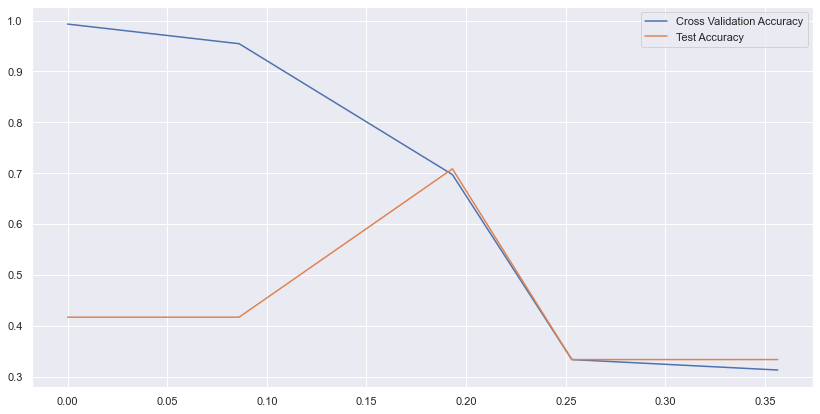

In [22]:
sns.set()

plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train, x=alphas, label="Cross Validation Accuracy")
sns.lineplot(y=accuracy_test, x=alphas, label="Test Accuracy")
plt.show()

In [23]:
print(best_alpha)
best_alpha = 0.20

0.1931091022464698


#### Findings
1. We have used the k-fold cross validation approach to find the best alpha.
2. The `best_alpha` parameter is chosen based on the highest test accuracy.

#### Decision Tree with the Best Alpha

In [24]:
X = diagnosis_data.drop(diagnosis_data.columns[-2:], axis=1)
Y = diagnosis_data.drop(diagnosis_data.columns[:-2], axis=1)

In [25]:
labelEncodersX = []
for x in X.columns[1:]:
    labelEncodersX.append(preprocessing.LabelEncoder())
    labelEncodersX[-1].fit(X[x].values.ravel())
    X[x] = labelEncodersX[-1].transform(X[x])
    
labelEncodersY = []
for y in Y.columns:
    labelEncodersY.append(preprocessing.LabelEncoder())
    labelEncodersY[-1].fit(Y[y].values.ravel())
    Y[y] = labelEncodersY[-1].transform(Y[y])

In [26]:
dt = tree.DecisionTreeClassifier(ccp_alpha = best_alpha)
dt_labelled = LabelPowerset(classifier = dt)
dt.fit(X, dt_labelled.transform(Y))

DecisionTreeClassifier(ccp_alpha=0.2)

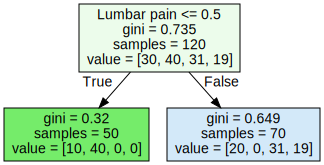

In [27]:
dotfile = open("../data/dt_pruned.dot", 'w')
tree.export_graphviz(dt, out_file=dotfile, feature_names=diagnosis_attr[:-2], filled=True)
dotfile.close()
graphviz.Source.from_file('../data/dt_pruned.dot')

In [28]:
tree_to_pseudo(dt, list(X.columns))

 if ( Lumbar pain <= 0.5 ) then :
	 return [10. 40.  0.  0.]
 else :
	 return [20.  0. 31. 19.]


#### Findings
1. The Minimal Decision Tree and the set of decision rules (IF-THEN rules) are shown above.
2. The decision rules are more interpretable since we use a lesser number of features to diagnose the patient.
3. The decision tree is more generalized since we make use of a model that performs well on both test and train data, and not just on the train/test data.
4. The interpretation of the results in the decision rules and the nodes in the decision tree is similar to the decision tree and the decision rules shown in the previous section.

#### 2. Lasso and Boosting for Regression

#### 2. a) Split into train and test set

In [29]:
train = communities_data.head(1495)
test = communities_data.tail(communities_data.shape[0] - 1495)

In [30]:
train

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,6,?,?,Hillsboroughtown,8,0.00,0.59,0.01,0.69,1.00,...,0.02,0.14,0.22,?,?,?,?,0.00,?,0.03
1491,6,?,?,Orangecity,8,0.16,0.62,0.03,0.74,0.48,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,13,?,?,Waycrosscity,8,0.01,0.36,0.95,0.24,0.03,...,0.03,0.12,0.01,?,?,?,?,0.00,?,0.30
1493,39,85,49056,Mentorcity,8,0.06,0.53,0.01,0.98,0.05,...,0.08,0.15,0.02,?,?,?,?,0.00,?,0.03


In [31]:
test

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1495,6,?,?,MillValleycity,8,0.00,0.20,0.03,0.91,0.23,...,0.01,0.23,0.73,?,?,?,?,0.00,?,0.12
1496,48,?,?,LiveOakcity,8,0.00,0.55,0.13,0.78,0.15,...,0.01,0.18,0.02,?,?,?,?,0.00,?,0.11
1497,35,?,?,Portalescity,8,0.00,0.52,0.04,0.59,0.05,...,0.01,0.18,0.00,?,?,?,?,0.00,?,0.12
1498,42,17,25112,Fallstownship,8,0.04,0.51,0.07,0.92,0.09,...,0.06,0.13,0.16,?,?,?,?,0.00,?,0.06
1499,51,683,48952,Manassascity,8,0.03,0.59,0.20,0.75,0.19,...,0.03,0.23,0.06,?,?,?,?,0.00,?,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


#### 2. b) Using Data Imputation to deal with missing values, and ignore non-predictive features

In [32]:
non_pred_features = ['state', 'county', 'community', 'communityname', 'fold']
train = train.drop(non_pred_features, axis=1)
test = test.drop(non_pred_features, axis=1)

In [33]:
for col in train.columns:
    train.loc[train[col] == '?', col] = -1
    test.loc[test[col] == '?', col] = -1

In [34]:
imp = SimpleImputer(missing_values=-1, strategy='mean')

In [35]:
imp.fit(train)

SimpleImputer(missing_values=-1)

In [36]:
train = pd.DataFrame(data=imp.transform(train), columns=train.columns)
test = pd.DataFrame(data=imp.transform(test), columns=train.columns)

In [37]:
train

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.070000,0.050000,0.850000,0.500000,0.61,0.190000,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03


In [38]:
test

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
1,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.11
2,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
3,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.06
4,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.09
495,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.45
496,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
497,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


#### Findings
1. As the data imputation strategy, we use the mean values of the respective features to fill in the missing values.
2. We use the same imputer (trained on the train set) to fill in the missing values for the test set too.

#### 2. c) Plotting a correlation matrix

In [39]:
train_X = train.drop(['ViolentCrimesPerPop'], axis=1)
corr = train_X.corr()
corr.style.background_gradient(cmap='coolwarm')

#### Findings
1. We have plotted the correlation matrix for the features above. 
2. We only use the train set to determine the correlations (as this is considered to be the _seen data_).

#### 2. d) Calculate the Coefficient of Variation for each feature

In [40]:
coef_var = []
for col in train_X.columns:
    coef_var.append((np.std(train_X[col]))/(np.mean(train_X[col])))

In [41]:
summary_data = {
                'Feature':  train_X.columns,
                'Coefficient of Variation': coef_var
               }

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Feature')

,Coefficient of Variation
Feature,
population,2.240355
householdsize,0.355681
racepctblack,1.428407
racePctWhite,0.330102
racePctAsian,1.358645
...,...
PolicOperBudg,0.743238
LemasPctPolicOnPatr,0.115700
LemasGangUnitDeploy,0.362868


#### 2. e) Scatterplot and Boxplot

In [42]:
helper_obj = []
for i in range(len(train_X.columns)):
    helper_obj.append({
        'column': train_X.columns[i],
        'coef': coef_var[i]
    })

helper_obj.sort(key = lambda x: x['coef'], reverse=True)

In [43]:
best_features = list(map(lambda x: x['column'], helper_obj[:math.floor(math.sqrt(128))]))

In [44]:
df = train_X[best_features]

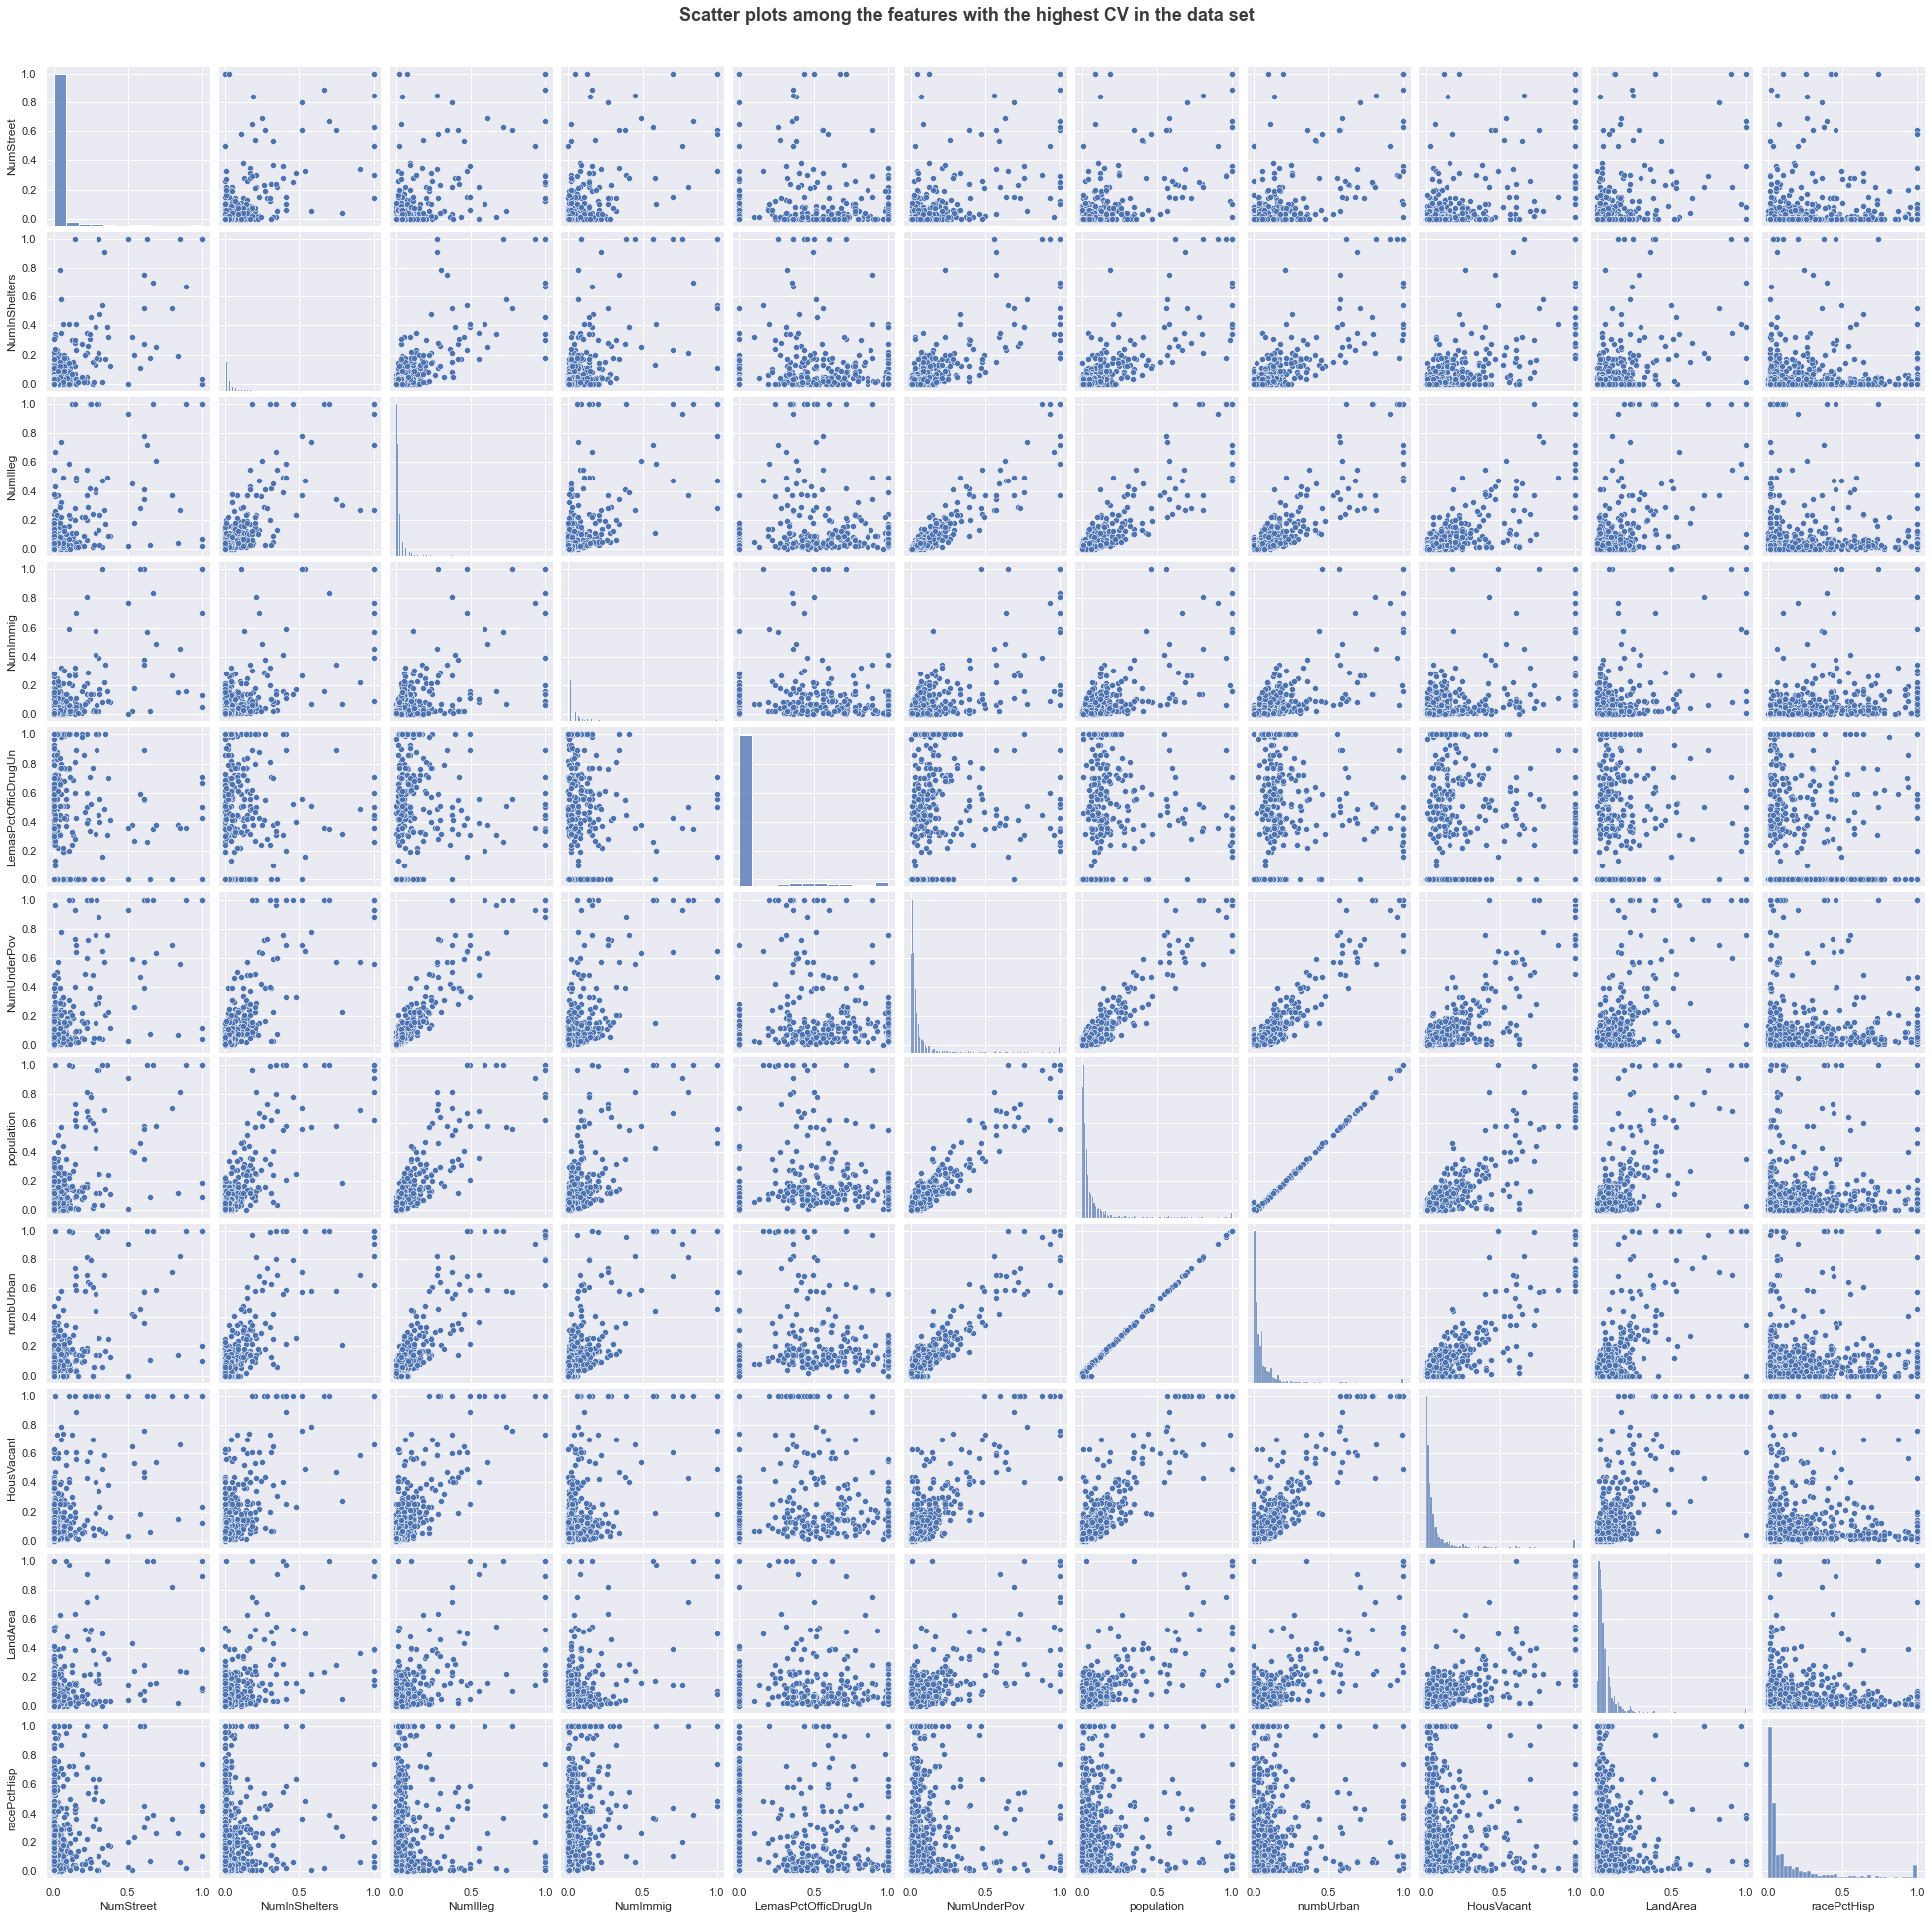

In [45]:
pairplot_fig = sns.pairplot(df, vars = df.columns)
plt.subplots_adjust(top=0.95)
pairplot_fig.fig.suptitle("Scatter plots among the features with the highest CV in the data set", fontsize=18, alpha=0.9, weight='bold')
plt.show()

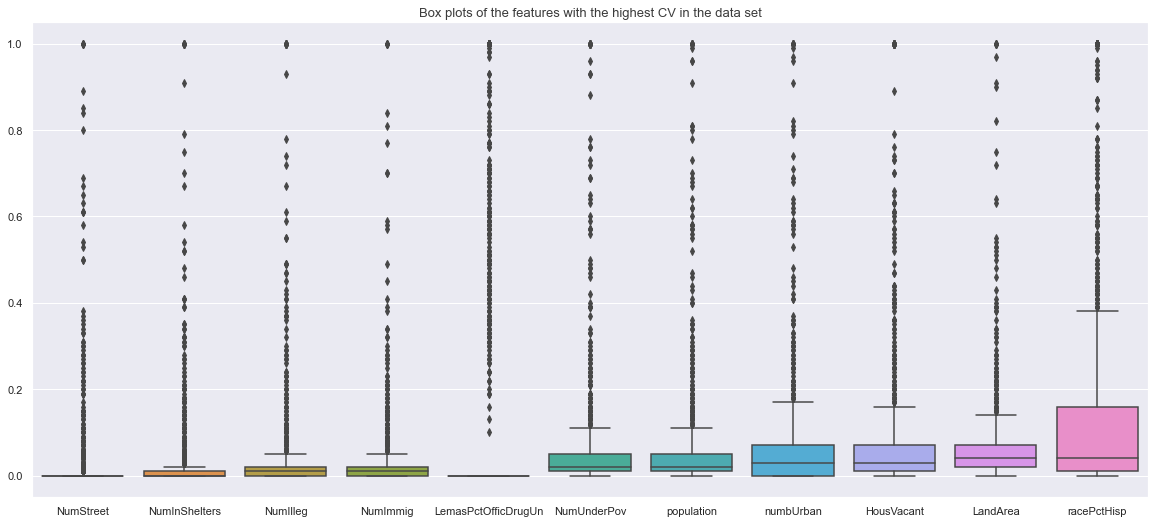

In [46]:
sns.set(rc = {'figure.figsize':(20,8)})
boxplot_fig = sns.boxplot(data=df)
plt.subplots_adjust(top=0.95)
boxplot_fig.set_title("Box plots of the features with the highest CV in the data set", fontsize=13, alpha=0.9)
plt.show()

#### Findings
1. From the scatterplots, we can say that the `population` and `numUrban` features are highly correlated.
2. From the scatterplots, we can also find that the rest of the features are non-correlated (even if they are correlated, they are correlated by a very small degree).
3. From the scatterplots, we can also say that the features have a high variance since each feature has a lot of points that are well spread out. (This can also be confirmed from the boxplots of the features)

#### 2. f) Fit a linear model

In [47]:
train_X = train.drop(['ViolentCrimesPerPop'], axis=1)
train_Y = train['ViolentCrimesPerPop']
reg = LinearRegression().fit(train_X, train_Y)

In [48]:
test_X = test.drop(['ViolentCrimesPerPop'], axis=1)
test_Y = test['ViolentCrimesPerPop']
test_Y_pred = reg.predict(test_X)
test_error = np.sum(np.square(test_Y - test_Y_pred))

In [49]:
print(f'Test Error: {test_error}')

Test Error: 2.1713994255842824e+19


#### Findings
1. The `test error` (Residual Sum of Squares) reported on fitting the linear model to the training set is approximately `2.17`.

#### 2. g) Fit a Ridge Regression Model

In [50]:
alphas = [x for x in range(1, 1001)]

regressor = RidgeCV(alphas=alphas, cv=5)

regressor.fit(train_X, train_Y)

RidgeCV(alphas=array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,...
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  9

In [51]:
test_Y_pred = regressor.predict(test_X)
test_error = np.sum(np.square(test_Y - test_Y_pred))

In [52]:
print(f'Best Alpha (or Lambda): {regressor.alpha_}')
print(f'Test Error: {test_error}')

Best Alpha (or Lambda): 2
Test Error: 8.793107487599833


#### Findings
1. The `test error` (Residual Sum of Squares) reported on fitting the ridge regression model to the training set is approximately `8.8`.

#### 2. h) Fit a Lasso Model

#### Non-standardized features

In [53]:
regressor = LassoCV(alphas=None, cv=5, max_iter=2000)

regressor.fit(train_X, train_Y)

LassoCV(cv=5, max_iter=2000)

In [54]:
test_Y_pred = regressor.predict(test_X)
test_error = np.sum(np.square(test_Y - test_Y_pred))

In [55]:
selected_features = []
for i in range(regressor.n_features_in_):
    if(float(regressor.coef_[i])!=0):
        selected_features.append(regressor.feature_names_in_[i])

In [56]:
non_st_alpha = regressor.alpha_
non_st_test_error = test_error
non_st_no_feat = len(selected_features)

In [57]:
print(f'Best Alpha (or Lambda): {regressor.alpha_}\n')
print(f'Test Error: {test_error}\n')
print(f'Number of Selected Features: {len(selected_features)}\n')
print(f'List of Selected Variables: \n\n{selected_features}')

Best Alpha (or Lambda): 0.0001161472362682987

Test Error: 8.861346398943516

Number of Selected Features: 75

List of Selected Variables: 

['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedO

#### Standardized features

In [58]:
model = LassoCV(alphas=None, cv=5, max_iter=2000)
pipeline = Pipeline([
                     ('scaler', StandardScaler()),
                     ('model', model)
])

In [59]:
pipeline.fit(train_X, train_Y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LassoCV(cv=5, max_iter=2000))])

In [60]:
test_Y_pred = pipeline.predict(test_X)
test_error = np.sum(np.square(test_Y - test_Y_pred))

In [61]:
selected_features = []
for i in range(pipeline['model'].n_features_in_):
    if(float(pipeline['model'].coef_[i])!=0):
        selected_features.append(train_X.columns[i])

In [62]:
st_alpha = pipeline["model"].alpha_
st_test_error = test_error
st_no_feat = len(selected_features)

In [63]:
print(f'Best Alpha (or Lambda): {pipeline["model"].alpha_}\n')
print(f'Test Error: {test_error}\n')
print(f'Number of Selected Features: {len(selected_features)}\n')
print(f'List of Selected Variables: \n\n{selected_features}')

Best Alpha (or Lambda): 0.0007630833878262516

Test Error: 8.884864299154271

Number of Selected Features: 73

List of Selected Variables: 

['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec5', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShel

In [64]:
summary_data = {
                'Model':  ['Lasso without standardized features', 'Lasso with standardized features'],
                'Best Alpha (or Lambda)': [non_st_alpha, st_alpha],
                'Number of Selected Features': [non_st_no_feat, st_no_feat],
                'Test Error': [non_st_test_error, st_test_error]
               }

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Model')

,Best Alpha (or Lambda),Number of Selected Features,Test Error
Model,,,
Lasso without standardized features,0.000116,75,8.861346
Lasso with standardized features,0.000763,73,8.884864


#### Findings
1. The test error remains almost the same for both the lasso regression models.
2. The number of features selected are almost similar for both the lasso regression models.
3. The only parameter that changes significantly in the model is the value of alpha (or lambda).
4. The Lasso model which makes use of standardized features has a higher lambda value.

#### 2. i) Fitting a PCR Model

##### Reference: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11-py.html

In [65]:
pca = PCA()
X_reduced = pca.fit_transform(scale(train_X))
X_reduced_test = pca.fit_transform(scale(test_X))

cv = RepeatedKFold(n_splits=5, random_state=1, n_repeats=3)

In [66]:
n = len(X_reduced)
regr = LinearRegression()
mse = []
test_errors = []

best_m = 122
least_mse = 1000

# Calculate MSE with only the intercept (no principal components in regression)
regr.fit(np.ones((n,1)), train_Y)
score = -1*cross_val_score(regr, np.ones((n,1)), train_Y.ravel(), cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)  
test_Y_pred = regr.predict(np.ones((len(X_reduced_test),1)))
test_error = mean_squared_error(test_Y,test_Y_pred)
test_errors.append(test_error)
    
#Calculate MSE using CV for the 122 principle components, adding one component at the time.
for i in range(1, len(X_reduced[0])+1):
    regr.fit(X_reduced[:,:i], train_Y)
    score = -1*cross_val_score(regr, X_reduced[:,:i], train_Y.ravel(), cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    if(mse[-1]<least_mse):
        best_m = i
        least_mse = mse[-1]
    test_Y_pred = regr.predict(X_reduced_test[:,:i])
    test_error = mean_squared_error(test_Y,test_Y_pred)
    test_errors.append(test_error)

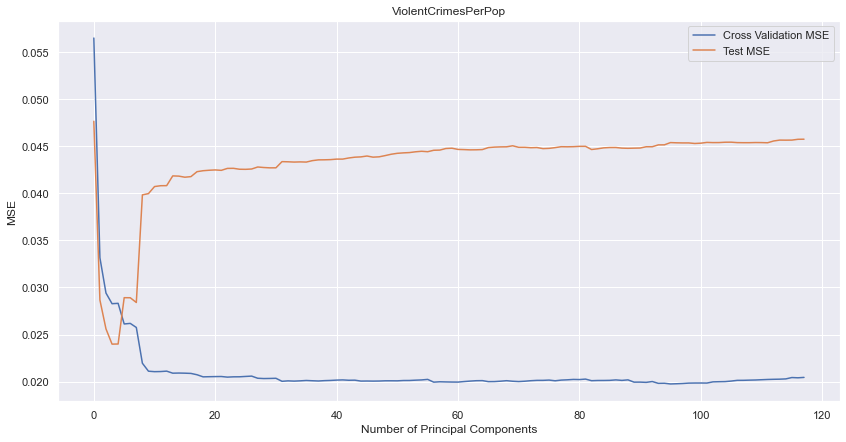

In [67]:
# We do not consider the elements towards the end of the mse and test_errors array to improve the readability of the graph.

sns.set()

plt.figure(figsize=(14,7))
sns.lineplot(y=mse[:-5], x=[x for x in range(0, len(X_reduced[0])+1)][:-5], label="Cross Validation MSE")
sns.lineplot(y=test_errors[:-5], x=[x for x in range(0, len(X_reduced[0])+1)][:-5], label="Test MSE")
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('ViolentCrimesPerPop')
plt.show()

In [68]:
X_reduced_train = pca.fit_transform(scale(train_X))

regr.fit(X_reduced_train[:,:best_m], train_Y)

X_reduced_test = pca.fit_transform(scale(test_X))

test_Y_pred = regr.predict(X_reduced_test[:,:best_m])

test_error = np.sum(np.square(test_Y - test_Y_pred))

In [69]:
summary_data = {
                'Model':  ['PCR Model'],
                'Best M': [best_m],
                'Test Error (RSS)': [test_error]
               }

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Model')

,Best M,Test Error (RSS)
Model,,
PCR Model,95,22.653923


#### Findings
1. The test error obtained using the PCR method is shown above.
2. We select the best M based on the cross-validation scores.

#### 2. j) Fit a Boosting Tree

In [70]:
train_dmatrix = xgb.DMatrix(data=train_X,label=train_Y)

In [71]:
cv = RepeatedKFold(n_splits=5, random_state=1, n_repeats=3)

mse = []
test_errors = []

best_alpha = 0
least_mse = 1000


for alpha in range(1, 1001):
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = alpha, n_estimators = 10)
    xg_reg.fit(train_X,train_Y)
    score = -1*cross_val_score(xg_reg, train_X, train_Y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1).mean()
    mse.append(score)
    if(mse[-1]<least_mse):
        best_alpha = alpha
        least_mse = mse[-1]
    test_Y_pred = xg_reg.predict(test_X)
    test_error = mean_squared_error(test_Y,test_Y_pred)
    test_errors.append(test_error)

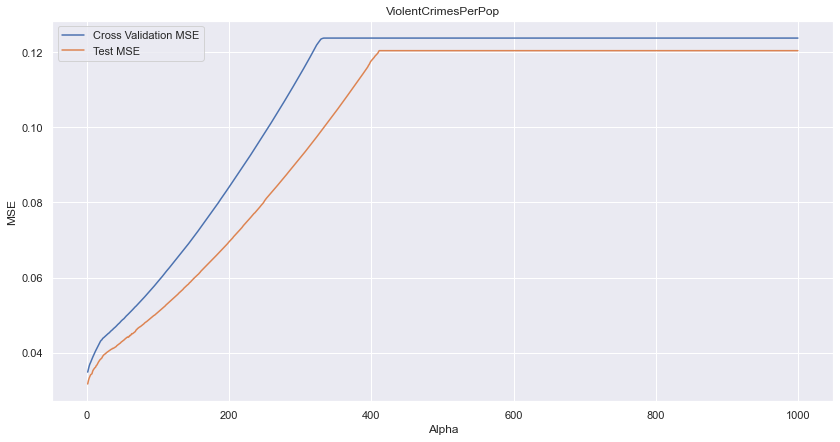

In [72]:
alphas = [x for x in range(1,1001)]

sns.set()

plt.figure(figsize=(14,7))
sns.lineplot(y=mse, x=alphas, label="Cross Validation MSE")
sns.lineplot(y=test_errors, x=alphas, label="Test MSE")
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('ViolentCrimesPerPop')
plt.show()

In [73]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = best_alpha, n_estimators = 10)
xg_reg.fit(train_X,train_Y)
test_Y_pred = xg_reg.predict(test_X)
test_error = np.sum(np.square(test_Y - test_Y_pred))

In [74]:
summary_data = {
                'Model':  ['Boosting Tree'],
                'Best Alpha': [best_alpha],
                'Test Error (RSS)': [test_error]
               }

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Model')

,Best Alpha,Test Error (RSS)
Model,,
Boosting Tree,1,15.821234


#### Findings
1. The Test Error and the best alpha value for the L1 penalized boosting tree is shown in the table above.